In [2]:
!conda env list

# conda environments:
#
maros_test               /home/mh731nk/.conda/envs/maros_test
mh731nk_guate_segmentation  *  /home/mh731nk/.conda/envs/mh731nk_guate_segmentation
base                     /var/conda
dv397ko_capsules         /var/conda/envs/dv397ko_capsules



In [4]:
import torch
import albumentations as albu

cuda:1


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_name(1))

In [11]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(device)


from PIL import Image
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
from torchvision import transforms, utils
from glob import glob

from torch.utils.data import Dataset
from pathlib import Path
import cv2

from dataset import GuatemalaSegDataset

# !pip install -U git+https://github.com/albumentations-team/albumentations


cuda:1


NVIDIA GeForce RTX 4090
NVIDIA GeForce RTX 4090


In [2]:
def get_training_augmentation(enhanced=False):
    
    if enhanced:
        train_transform = [ 
            albu.HorizontalFlip(p=0.5),
            albu.VerticalFlip(p=0.5),
            albu.Transpose(p=0.3),
            albu.RandomRotate90(p=0.5),
            albu.OneOf([
                albu.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                albu.GridDistortion(p=0.5),
                albu.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
            ],p=0.1),
        ]
    else:
        train_transform = [ 
            albu.HorizontalFlip(p=0.2),
            albu.VerticalFlip(p=0.2),
            albu.Transpose(p=0.2),
            albu.RandomRotate90(p=0.2),
        ]
    return albu.Compose(train_transform)

In [3]:
def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')

def get_preprocessing(preprocessing_fn):
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

In [4]:
# dataset.dem.shape
MASK_PATH = "data/mounds.png"
DEM_PATH = "data/DEM.npz"
TILE_SIZE = (512,512)
STEP = 128

AUGU_ENHANCED = True

In [5]:
min_transform = transforms.Compose([
    transforms.ToTensor()
    ])

Loaded full dem of size: (17092, 9791)
Loaded mask:  mounds.png
Selected region dem of size: (17092, 9791)
Coordinates of the region: None
Number of samples in tiles is: 9490


In [6]:
dataset = GuatemalaSegDataset(tile_size=TILE_SIZE,
                              dem_path = DEM_PATH,
                              mask_path = MASK_PATH,
                              step = STEP,
                              transform=min_transform,
                              augmentation = get_training_augmentation(AUGU_ENHANCED))

TESTING REGION is RED, TRAINING is GREEN


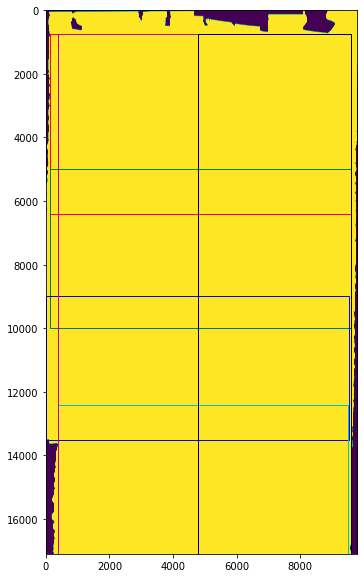

In [7]:

# Marek
#TRAINING_REGION = (693, 745, 9635, 17092)
#TESTING_REGION = (693, 11658, 9140 ,16665)

# Region from old notebook
# TESTING_REGION = (183, 745, 9635, 6848)
# TRAINING_REGION  = (370, 6848, 9409 ,17092) #2 - 8659

#TESTING_REGION = (370, 6848, 9409 ,17092) 
#TRAINING_REGION  = (183, 745, 9635, 6848)
#TESTING_REGION = (183, 745, 9635, 6848)
#TRAINING_REGION  = (370, 6848, 9409 ,17092)




# # RUN 1
# # AREA 1
# TRAINING_REGION_1 = (393, 745, 9600,6092)
# TESTING_REGION_1 = (693, 11658, 9140 ,16665)

# # AREA 2
# TRAINING_REGION_2 = (393, 6092, 9600,11092)
# TESTING_REGION_2 = (693, 11658, 9140 ,16665)

# # AREA 3
# TRAINING_REGION_3 = (693, 11092, 9500,17000)
# TESTING_REGION_3 = (693, 11658, 9140 ,16665)

# RUN 2
# AREA 1
TRAINING_REGION_1 = (150, 745, 9600,6395)
TESTING_REGION_1 = (693, 11658, 9140 ,16665)

# AREA 2
TRAINING_REGION_2 = (150, 5000, 9600,10000)
TESTING_REGION_2 = (693, 11658, 9140 ,16665)

# AREA 3
TRAINING_REGION_3 = (10, 9000, 9550, 13500)
TESTING_REGION_3 = (693, 11800, 9140 ,16700)

# AREA 4
TRAINING_REGION_4 = (400, 12400, 9500,17092)
TESTING_REGION_4 = (693, 11700, 9140 ,16665)

# AREA 5
TRAINING_REGION_5 = (400, 745, 4800,17092)
TESTING_REGION_5 = (693, 11700, 9140 ,16665)

# AREA 6
TRAINING_REGION_6 = (4800, 745, 9600,17092)
TESTING_REGION_6 = (693, 11700, 9140 ,16665)


TRAINING_REGION = TRAINING_REGION_6
TESTING_REGION = TESTING_REGION_6

TESTING REGION is RED, TRAINING is GREEN


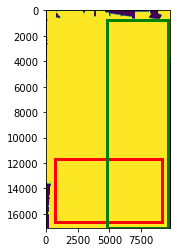

In [8]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(dataset.dem)
print("TESTING REGION is RED, TRAINING is GREEN")
rect = patches.Rectangle((TRAINING_REGION_1[0], TRAINING_REGION_1[1]), TRAINING_REGION_1[2]-TRAINING_REGION_1[0], TRAINING_REGION_1[3]-TRAINING_REGION_1[1], 
                          linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((TRAINING_REGION_2[0], TRAINING_REGION_2[1]), TRAINING_REGION_2[2]-TRAINING_REGION_2[0], TRAINING_REGION_2[3]-TRAINING_REGION_2[1], 
                          linewidth=1, edgecolor='g', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((TRAINING_REGION_3[0], TRAINING_REGION_3[1]), TRAINING_REGION_3[2]-TRAINING_REGION_3[0], TRAINING_REGION_3[3]-TRAINING_REGION_3[1], 
                          linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((TRAINING_REGION_4[0], TRAINING_REGION_4[1]), TRAINING_REGION_4[2]-TRAINING_REGION_4[0], TRAINING_REGION_4[3]-TRAINING_REGION_4[1], 
                          linewidth=1, edgecolor='c', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((TRAINING_REGION_5[0], TRAINING_REGION_5[1]), TRAINING_REGION_5[2]-TRAINING_REGION_5[0], TRAINING_REGION_5[3]-TRAINING_REGION_5[1], 
                          linewidth=1, edgecolor='m', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((TRAINING_REGION_6[0], TRAINING_REGION_6[1]), TRAINING_REGION_6[2]-TRAINING_REGION_6[0], TRAINING_REGION_6[3]-TRAINING_REGION_6[1], 
                          linewidth=1, edgecolor='k', facecolor='none')
ax.add_patch(rect)

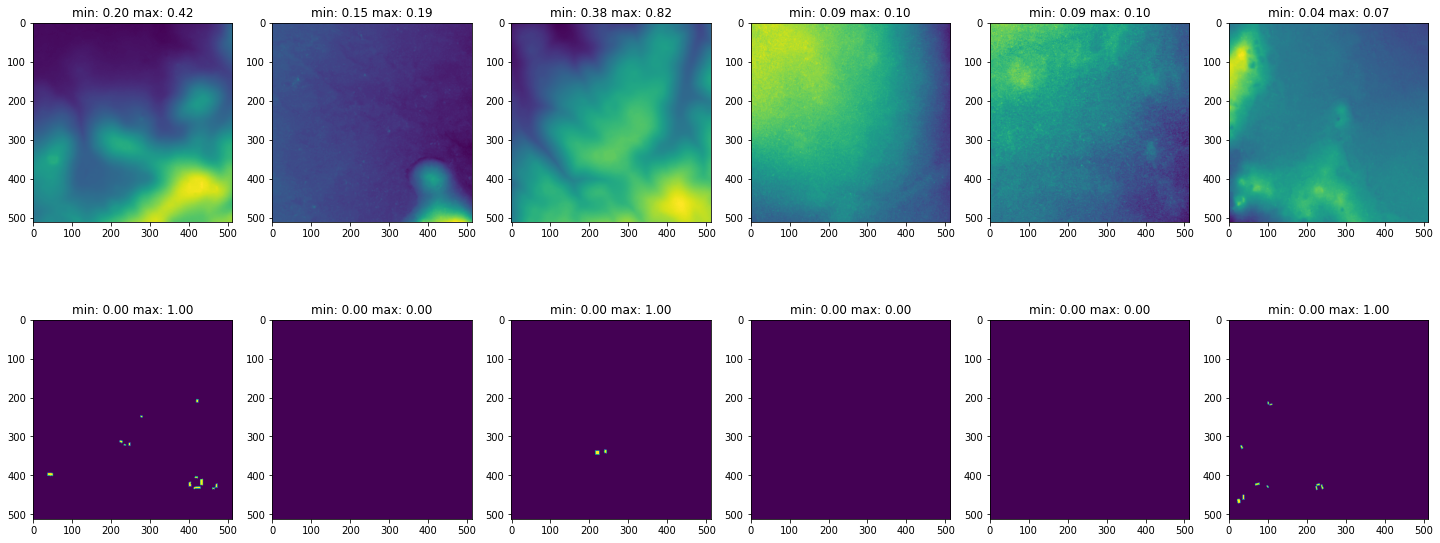

In [9]:
import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.imshow(dataset.dem)
print("TESTING REGION is RED, TRAINING is GREEN")
rect = patches.Rectangle((TESTING_REGION[0], TESTING_REGION[1]), TESTING_REGION[2]-TESTING_REGION[0], TESTING_REGION[3]-TESTING_REGION[1], 
                          linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((TRAINING_REGION[0], TRAINING_REGION[1]), TRAINING_REGION[2]-TRAINING_REGION[0], TRAINING_REGION[3]-TRAINING_REGION[1], 
                          linewidth=3, edgecolor='g', facecolor='none')
ax.add_patch(rect)

In [10]:
fig, axs = plt.subplots(2, 6,figsize=(25,10))

sample = np.random.randint(0,len(dataset),64)
for i in range(6):
    img, mask = dataset.__getitem__(sample[i])
    axs[0,i].imshow(torch.squeeze(img))
    axs[0,i].set_title("min: {:.2f} max: {:.2f}".format(torch.min(img),torch.max(img)))
    axs[1,i].imshow(torch.squeeze(mask))
    axs[1,i].set_title("min: {:.2f} max: {:.2f}".format(torch.min(mask),torch.max(mask)))


In [11]:
from torch.utils.data import DataLoader

rr_dim = TRAINING_REGION[2]-TRAINING_REGION[0]
cc_dim = TRAINING_REGION[3]-TRAINING_REGION[1] 
vr_proportion = 0.7

TR = (TRAINING_REGION[0], 
      TRAINING_REGION[1],
      TRAINING_REGION[2], 
     int(TRAINING_REGION[1] + cc_dim * vr_proportion))

VR = (TRAINING_REGION[0], 
      int(TRAINING_REGION[1] + cc_dim * vr_proportion), 
      TRAINING_REGION[2],
      TRAINING_REGION[3])

Training dataset
Loaded full dem of size: (17092, 9791)
Loaded mask:  mounds.png
Selected region dem of size: (11442, 4800)
Coordinates of the region: (4800, 745, 9600, 12187)
Number of samples in tiles is: 2924

Validation dataset
Loaded full dem of size: (17092, 9791)
Loaded mask:  mounds.png
Selected region dem of size: (4905, 4800)
Coordinates of the region: (4800, 12187, 9600, 17092)
Number of samples in tiles is: 1190


In [12]:
print("Training dataset")
train_dataset = GuatemalaSegDataset(region=TR,
                                    dem_path = DEM_PATH,
                                    mask_path = MASK_PATH,
                                    transform=min_transform,
                                    tile_size=TILE_SIZE,
                                    step = STEP,
                                    augmentation = get_training_augmentation(AUGU_ENHANCED))
print("\n=============\nValidation dataset")
valid_dataset = GuatemalaSegDataset(region=VR,
                                    dem_path = DEM_PATH,
                                    mask_path = MASK_PATH,
                                    tile_size=TILE_SIZE,
                                    step = STEP,
                                    transform=min_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=24)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=12)

In [14]:
# !pip install git+https://github.com/qubvel/segmentation_models.pytorch
import segmentation_models_pytorch as smp
# smp.utils.losses.DiceLoss()

# conda environments:
#
base                     C:\ProgramData\Anaconda3
Main                     C:\ProgramData\Anaconda3\envs\Main
condaEnv                 C:\ProgramData\Anaconda3\envs\condaEnv
pythonProject1           C:\ProgramData\Anaconda3\envs\pythonProject1
hliboky                  C:\Users\uzivatel\.conda\envs\hliboky
hliboky2              *  C:\Users\uzivatel\.conda\envs\hliboky2
tf2                      C:\Users\uzivatel\.conda\envs\tf2
                         C:\Users\uzivatel\anaconda3



Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hlibokymaros. Use `wandb login --relogin` to force relogin


True

In [ ]:
ENCODER = 'efficientnet-b3'
#ENCODER = "efficientnet-b3" # changing backbone is useless it is massive anyway
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['structure']
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multicalss segmentation
DEVICE = device
LR=0.0001

#model_type = "UnetPlusPlus"
#model = smp.UnetPlusPlus(
#    encoder_name=ENCODER,
#    encoder_weights=ENCODER_WEIGHTS, 
#    classes=len(CLASSES), 
#    activation=ACTIVATION,
#    in_channels=1
#)

model_type = "UnetPlusPlus_update"
model = smp.UnetPlusPlus(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    classes=len(CLASSES),
    activation=ACTIVATION,
    in_channels=1,
    decoder_use_batchnorm = True,
    decoder_attention_type = "scse"
)

#model_type = "MaNet"
#model = smp.MAnet(
#    encoder_name=ENCODER,
#    encoder_weights=ENCODER_WEIGHTS, 
#    classes=len(CLASSES), 
#    activation=ACTIVATION,
#    in_channels=1
#)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)


# loss = smp.utils.losses.DiceLoss() 
loss = smp.utils.losses.JaccardLoss()

metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
    smp.utils.metrics.Accuracy(),
    smp.utils.metrics.Precision(),
    smp.utils.metrics.Recall(),
    smp.utils.metrics.Fscore()
]

val_metrics= [
    smp.utils.metrics.IoU(threshold=0.5),
    smp.utils.metrics.Accuracy(),
    smp.utils.metrics.Precision(),
    smp.utils.metrics.Recall(),
    smp.utils.metrics.Fscore()
]

optimizer = torch.optim.Adam([
    dict(params=model.parameters(), lr=LR),
])

train_epoch = smp.utils.train.TrainEpoch(
    model,
    loss=loss,
    metrics=metrics,
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model,
    loss=loss,
    metrics=val_metrics,
    device=DEVICE,
    verbose=True,
)

In [15]:
!conda env list
import wandb

wandb.login()

#78a66810907d9cfb7e6c4ba09734249f547efe26


Epoch: 0
train: 100%|█| 366/366 [03:28<00:00,  1.76it/s, jaccard_loss - 0.9886, iou_score - 0.051, accuracy - 0.9226, precision 
valid: 100%|█| 1190/1190 [00:57<00:00, 20.73it/s, jaccard_loss - 0.9855, iou_score - 0.2684, accuracy - 0.9946, precisi
{'jaccard_loss': 0.9885672596308706, 'iou_score': 0.051004312848470346, 'accuracy': 0.9225910374375641, 'precision': 0.05189854462726146, 'recall': 0.9298787874128492, 'fscore': 0.09017393533371018}
{'jaccard_loss': 0.9854628986170304, 'iou_score': 0.26842407778314636, 'accuracy': 0.9945766577199727, 'precision': 0.796019747556727, 'recall': 0.2760059230147742, 'fscore': 0.30580188126342595}
Validation loss decreased (inf --> 0.988567).  Saving model ...
Model saved!

Epoch: 1
train: 100%|█| 366/366 [03:26<00:00,  1.77it/s, jaccard_loss - 0.835, iou_score - 0.2684, accuracy - 0.9976, precision 
valid: 100%|█| 1190/1190 [00:57<00:00, 20.56it/s, jaccard_loss - 0.8574, iou_score - 0.2819, accuracy - 0.9802, precisi
{'jaccard_loss': 0.835012782

In [ ]:
wandb.init(project="TUKE-KKUI-Guatemala-Segmentation", entity="hlibokymaros")

In [ ]:
from datetime import datetime
now = datetime.now() # current date and time
max_score = 0
MAX_EPOCHS = 40
training_TS = now.strftime("%H_%M_%d_%m_%Y") 
early_stop_count = 5



run = wandb.init(project="TUKE-KKUI-Guatemala-Segmentation",
             config={"title_size": TILE_SIZE,
                     "step_size": STEP,
                     "dem_path": DEM_PATH,
                     "mask_path": MASK_PATH,
                     "train_region":TRAINING_REGION,
                     "test_region":TESTING_REGION,
                     "augumentation_enhanced" : AUGU_ENHANCED,
                     "max_epoch" : MAX_EPOCHS,
                     "model": model_type,
                     "notes": "AGREGATION - RUN2- AREA5",
                     "encoder": ENCODER,
                     "encoder_weights" : ENCODER_WEIGHTS,
                     "activation": ACTIVATION,
                     "learning_rate": LR,
                     "loss": loss,
                     "ealry_stopping_count": early_stop_count
                     } )

from pytorchtools import EarlyStopping
early_stopping = EarlyStopping(patience=early_stop_count, verbose=True, path='models/new/{}_{}.pth'.format(MASK_PATH.split('/')[-1].split('.')[0],str(wandb.run.name)))

for i in range(0, MAX_EPOCHS):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    print(train_logs)
    print(valid_logs)
    wandb.log({"epoch": i, 
               "train_loss": list(train_logs.values())[0], "train_iou": train_logs["iou_score"] , "train_accuracy": train_logs["accuracy"], "train_precision": train_logs["precision"], "train_recall": train_logs["recall"], "train_fscore": train_logs["fscore"],
               "valid_loss": list(valid_logs.values())[0], "valid_iou": valid_logs["iou_score"] , "valid_accuracy": valid_logs["accuracy"], "valid_precision": valid_logs["precision"], "valid_recall": valid_logs["recall"], "valid_fscore": valid_logs["fscore"]})    
   
    if early_stop_count:
        early_stopping(list(train_logs.values())[0], model)

        if early_stopping.early_stop:
            print("Early stopping")
            break
    if early_stop_count:
        model.load_state_dict(torch.load('models/new/{}_{}.pth'.format(MASK_PATH.split('/')[-1].split('.')[0],str(wandb.run.name))))
        
        
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, 'models/{}_{}.pth'.format(MASK_PATH.split('/')[-1].split('.')[0],training_TS))
        print('Model saved!')

    if i == 20:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-%4!')

-4

Loaded full dem of size: (17092, 9791)
Loaded mask:  mounds.png
Selected region dem of size: (4965, 8447)
Coordinates of the region: (693, 11700, 9140, 16665)
Number of samples in tiles is: 144


In [19]:
a = 4
-a

valid: 100%|█| 144/144 [00:05<00:00, 24.52it/s, jaccard_loss - 0.7621, iou_score - 0.2396, accuracy - 0.8302, precision


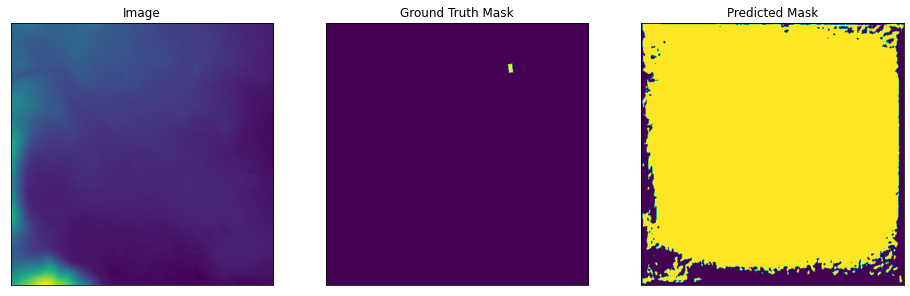

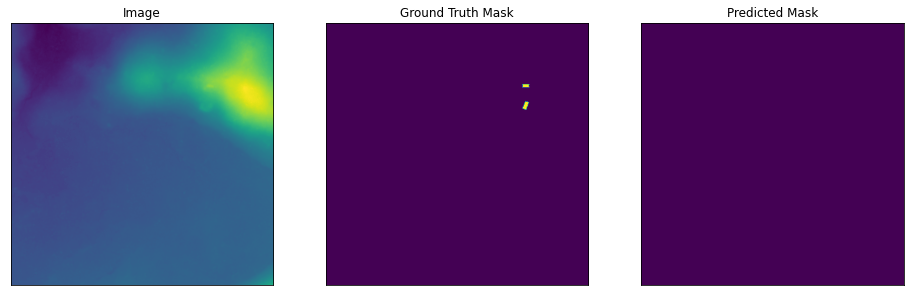

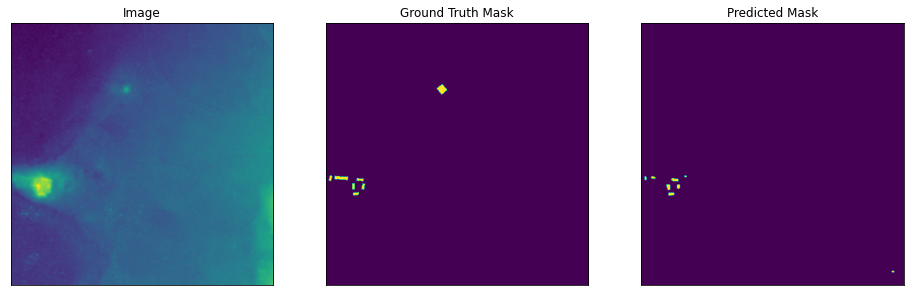

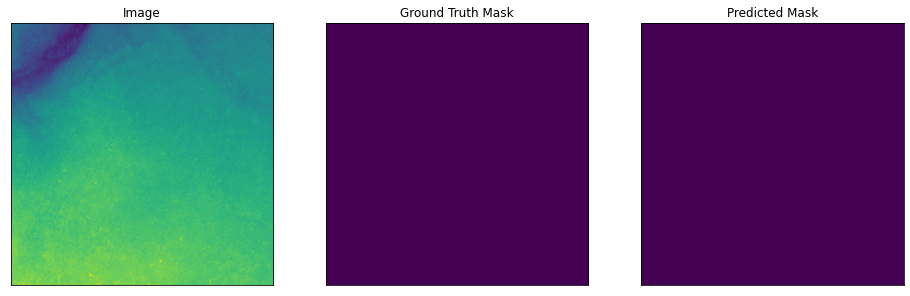

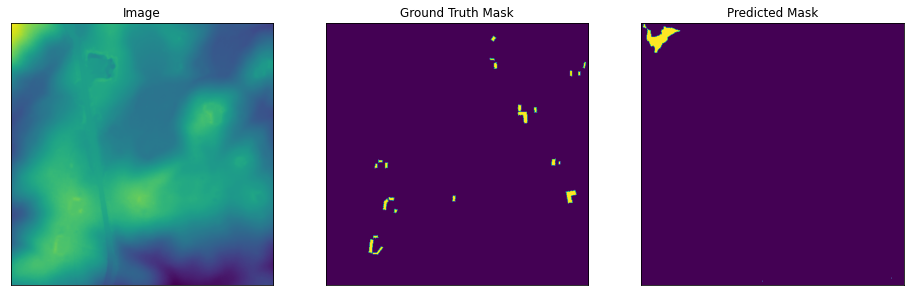

In [21]:
test_dataset = GuatemalaSegDataset(region= TESTING_REGION,
                                   dem_path = DEM_PATH,
                                   mask_path = MASK_PATH,
                                   tile_size=TILE_SIZE,
                                   transform=min_transform)

test_dataloader = DataLoader(test_dataset)

Loaded full dem of size: (34995, 22003)
Loaded mask:  mounds.png
Selected region dem of size: (34995, 22003)
Coordinates of the region: None
Number of samples in tiles is: 2856


In [22]:
test_epoch = smp.utils.train.ValidEpoch(
    model=model,
    loss=loss,
    metrics=val_metrics,
    device=DEVICE,
)

logs = test_epoch.run(test_dataloader)

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

for i in range(5):
    n = np.random.choice(len(test_dataset))
    
    image, gt_mask = test_dataset[n]
    
    gt_mask = gt_mask.squeeze()
    
    x_tensor = image.to(DEVICE).unsqueeze(0)
    pr_mask = model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
    visualize(
        image=torch.squeeze(image), 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )

In [23]:
inference_dataset = GuatemalaSegDataset(dem_path="data/DEM_large.npz", 
                                        mask_path = "data/mounds.png",  
                                        tile_size=TILE_SIZE,
                                        train=False,
                                        transform=min_transform)


'output/prediction_mounds_kind-sunset-65.png'

In [ ]:
steps_row = np.append(np.arange(0,
                      inference_dataset.dem.shape[0]-inference_dataset.tile_size[0]-1,
                      inference_dataset.step),inference_dataset.dem.shape[0]-inference_dataset.tile_size[0]-1)
steps_column =  np.append(np.arange(0,
                          inference_dataset.dem.shape[1]-inference_dataset.tile_size[1]-1,
                          inference_dataset.step),inference_dataset.dem.shape[1]-inference_dataset.tile_size[1]-1)
predicted_map = np.zeros(inference_dataset.dem.shape)

GT_map = inference_dataset.mask
idx = 0

In [ ]:
for rr in steps_row:
    for cc in steps_column:
        image = torch.tensor(inference_dataset.dem[rr:rr+inference_dataset.tile_size[0],cc:cc+inference_dataset.tile_size[1]])
        x_tensor = image.unsqueeze(0).unsqueeze(0).to(DEVICE)
        pr_mask = model.predict(x_tensor)
        pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        predicted_map[rr:rr+inference_dataset.tile_size[0],cc:cc+inference_dataset.tile_size[1]] +=  pr_mask


In [ ]:

from skimage import io



In [ ]:
io.imsave("output/prediction_{}_{}.png".format(MASK_PATH.split('/')[-1].split('.')[0],str(wandb.run.name)).format(MASK_PATH.split('/')[-1].split('.')[0],str(wandb.run.name)), ((predicted_map>0.5)*255).astype(np.uint8) )

In [ ]:
"output/prediction_{}_{}.png".format(MASK_PATH.split('/')[-1].split('.')[0],str(wandb.run.name)).format(MASK_PATH.split('/')[-1].split('.')[0],str(wandb.run.name))